# diabates CNN 후 사전학습 후 미세 조정

In [2]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("C:/Users/Administrator/dataset/diabetes.csv", index_col=0)
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
10,101,76,48,180,32.9,0.171,63,0
2,122,70,27,0,36.8,0.340,27,0
5,121,72,23,112,26.2,0.245,30,0


In [4]:
#컬럼명 확인
df.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
#레이블 개수 확인 (숫자)
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [6]:
#결측치 확인
df.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
#결측치 제거
df = df.dropna()
df.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
#outcome만 제거하고 x를 만든다
X=df.drop('Outcome',axis=1)
X.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,,,,,,,
6,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
8,183,64,0,0,23.3,0.672,32
1,89,66,23,94,28.1,0.167,21
0,137,40,35,168,43.1,2.288,33


In [9]:
#레이블만 남겨둔다.
y=df['Outcome']
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split
#트레인, 테스트 각각 나눠주기
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)

In [11]:
# 데이터 표준화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
# CNN 입력에 맞게 차원 조정
X_train = X_train.reshape(-1, X_train.shape[1], 1)
X_test = X_test.reshape(-1, X_test.shape[1], 1)

# CNN 모델 생성
- CNN 구조를 정의하고, 당뇨병 여부를 이진 분류하기 위한 이진 출력층을 추가
- 모델을 학습시킨 후, 해당 모델을 저장

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

In [15]:
# CNN 모델 생성
model = Sequential([
    Conv1D(32, 3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # 이진 분류를 위한 출력층
])

# 모델 컴파일
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# 모델 학습
model_history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.6122 - loss: 0.6736 - val_accuracy: 0.7135 - val_loss: 0.6299
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6798 - loss: 0.6189 - val_accuracy: 0.7292 - val_loss: 0.5964
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7117 - loss: 0.5811 - val_accuracy: 0.7448 - val_loss: 0.5670
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7325 - loss: 0.5532 - val_accuracy: 0.7448 - val_loss: 0.5428
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7305 - loss: 0.5488 - val_accuracy: 0.7500 - val_loss: 0.5206
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7543 - loss: 0.5157 - val_accuracy: 0.7448 - val_loss: 0.5110
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7390 - loss: 0.5213 - val_accuracy: 0.7500 - val_loss: 0.5065
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7638 - loss: 0.4881 - val_accuracy: 0.7604 - va

In [23]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)                    │ (None, 5, 32)               │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 2, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,061 (51.02 KB)

 Trainable params: 4,353 (17.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,708 (34.02 KB)

In [16]:
# 모델 저장
model.save('diabetes_cnn_model.h5')

# 사전학습 된 모델을 불러오고 fine-tuning
- 저장된 모델을 불러온 후, 추가적인 층과 출력층을 쌓아 새로운 분류 문제를 해결할 수 있도록 하고, 전체 모델을 미세조정
- 미세 조정 : 사전학습된 모델의 일부 층을 고정하고, 나머지 층을 재학습시켜 새로운 데이터셋에 맞게 조정하는 과정, 주로 추가적인 층을 쌓고, 출력층을 변경하여 새로운 분류나 예측 문제에 맞게 적용

In [17]:
from tensorflow.keras.models import load_model

# 저장된 모델 불러오기
pretrained_model = load_model('diabetes_cnn_model.h5')

In [18]:
# 추가적인 층과 출력층 추가
pretrained_model.add(Dense(128, activation='relu'))
pretrained_model.add(Dense(1, activation='sigmoid'))  # 새로운 출력층

In [20]:
# 미세조정할 층을 지정하고, 미세조정 설정
for layer in pretrained_model.layers[:-2]:  # 기존 층은 동결
    layer.trainable = False

# 모델 컴파일 및 미세조정
pretrained_model.compile(optimizer=Adam(learning_rate=1e-5), loss='binary_crossentropy', metrics=['accuracy'])

# 미세조정 학습
pretrained_model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.6418 - loss: 0.6944 - val_accuracy: 0.6771 - val_loss: 0.6929
Epoch 2/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6366 - loss: 0.6941 - val_accuracy: 0.6771 - val_loss: 0.6927
Epoch 3/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6166 - loss: 0.6953 - val_accuracy: 0.6771 - val_loss: 0.6925
Epoch 4/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6525 - loss: 0.6942 - val_accuracy: 0.6771 - val_loss: 0.6923
Epoch 5/5
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6412 - loss: 0.6944 - val_accuracy: 0.6771 - val_loss: 0.6922


In [24]:
pretrained_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)                    │ (None, 5, 32)               │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 2, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,510 (21.53 KB)

 Trainable params: 385 (1.50 KB)

 Non-trainable params: 4,353 (17.00 KB)

 Optimizer params: 772 (3.02 KB)

- 사전학습된 모델은 더 많은 정보를 활용하고, 특정 작업에서 성능을 향상시킬 수 있으며, 파라미터 수가 많고 더 복잡한 구조를 가질 수 있음

Epoch 1/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6619 - loss: 0.6912 - val_accuracy: 0.6771 - val_loss: 0.6911
Epoch 2/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6404 - loss: 0.6924 - val_accuracy: 0.6771 - val_loss: 0.6910
Epoch 3/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6053 - loss: 0.6942 - val_accuracy: 0.6771 - val_loss: 0.6908
Epoch 4/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6299 - loss: 0.6930 - val_accuracy: 0.6771 - val_loss: 0.6906
Epoch 5/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6209 - loss: 0.6933 - val_accuracy: 0.6771 - val_loss: 0.6905
Epoch 6/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6525 - loss: 0.6914 - val_accuracy: 0.6771 - val_loss: 0.6903
Epoch 7/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6471 - loss: 0.6921 - val_accuracy: 0.6771 - val_loss: 0.6901
Epoch 8/15
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6214 - loss: 0.6930 - val_accuracy: 0.6771 - val_l

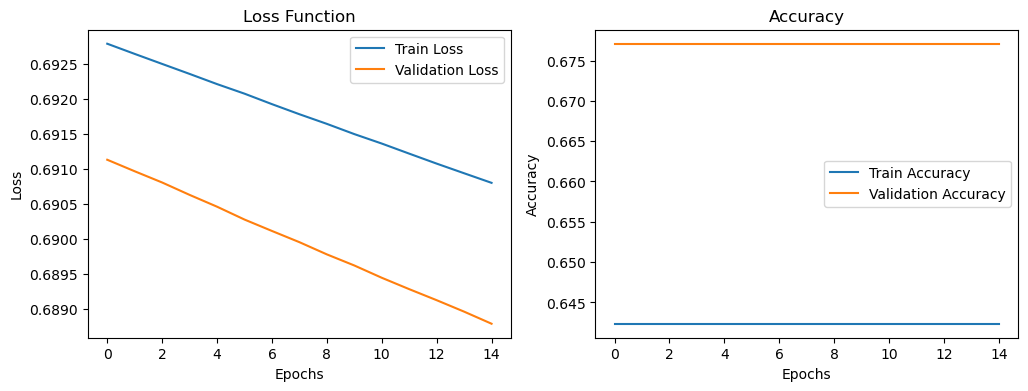

In [22]:
import matplotlib.pyplot as plt

# 모델 학습
history = pretrained_model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test))

# 손실 함수 시각화
plt.figure(figsize=(12, 4))

# 손실 함수
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Function')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# 정확도
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


- 차이가 크지는 않지만, 성능이 미세하게라도 개선되고는 있음, 